In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("prs_com_metricas.csv")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found

In [2]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [3]:
df_no_outliers_additions = remove_outliers(df, 'additions')
df_no_outliers_deletions = remove_outliers(df, 'deletions')
df_no_outliers_changed_files = remove_outliers(df, 'changed_files')


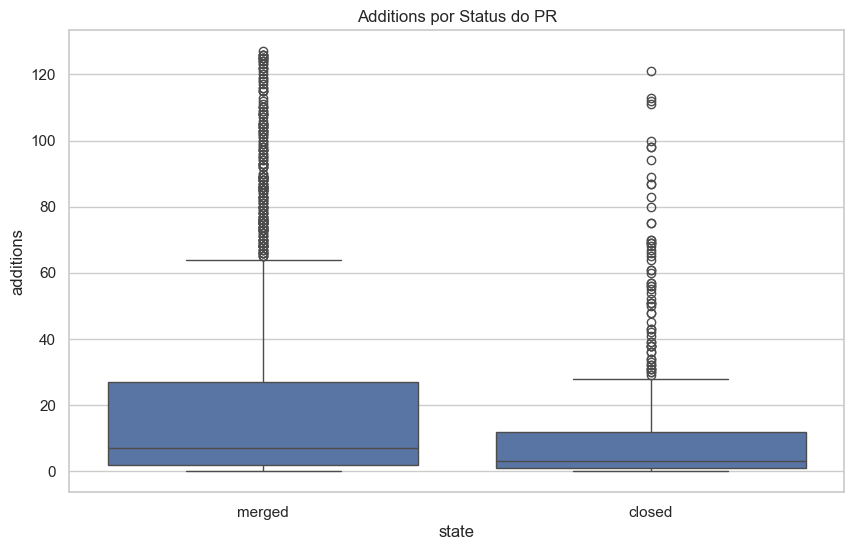

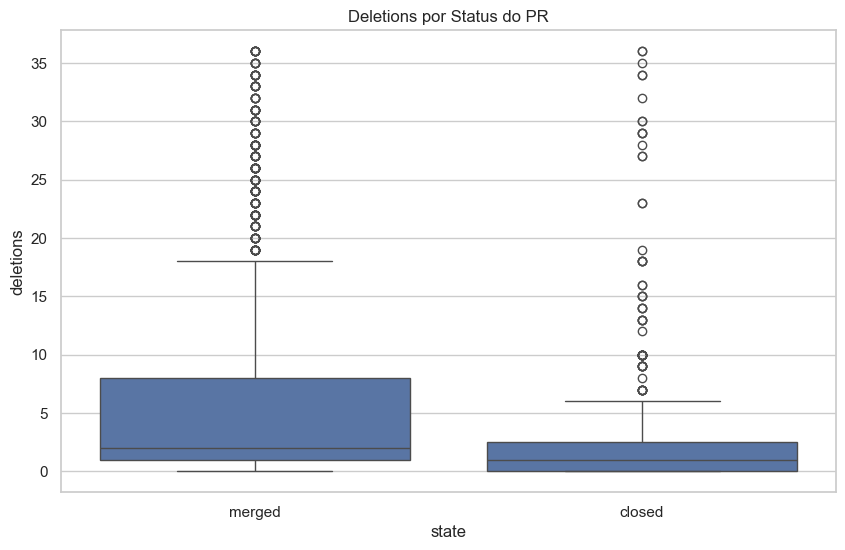

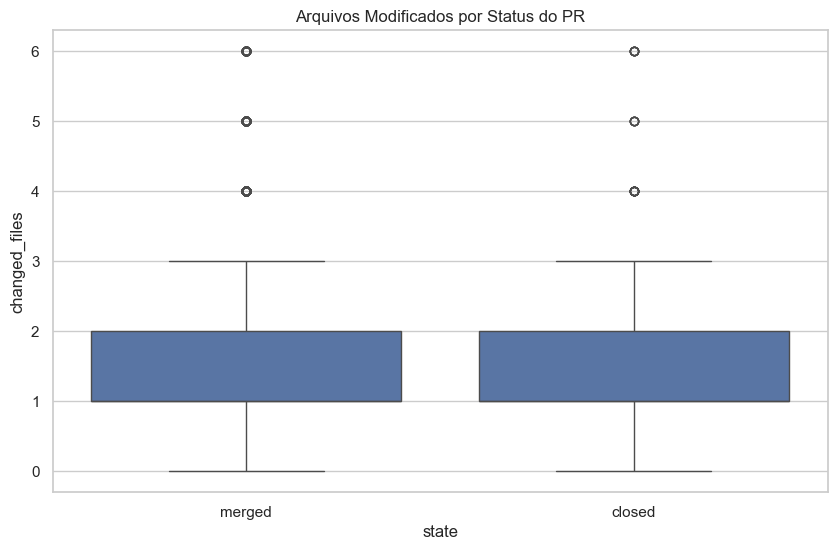

In [4]:
# RQ01: Tamanho do PR × Status (merged/closed)
sns.boxplot(x='state', y='additions', data=df_no_outliers_additions)
plt.title("Additions por Status do PR")
plt.show()

sns.boxplot(x='state', y='deletions', data=df_no_outliers_deletions)
plt.title("Deletions por Status do PR")
plt.show()

sns.boxplot(x='state', y='changed_files', data=df_no_outliers_changed_files)
plt.title("Arquivos Modificados por Status do PR")
plt.show()


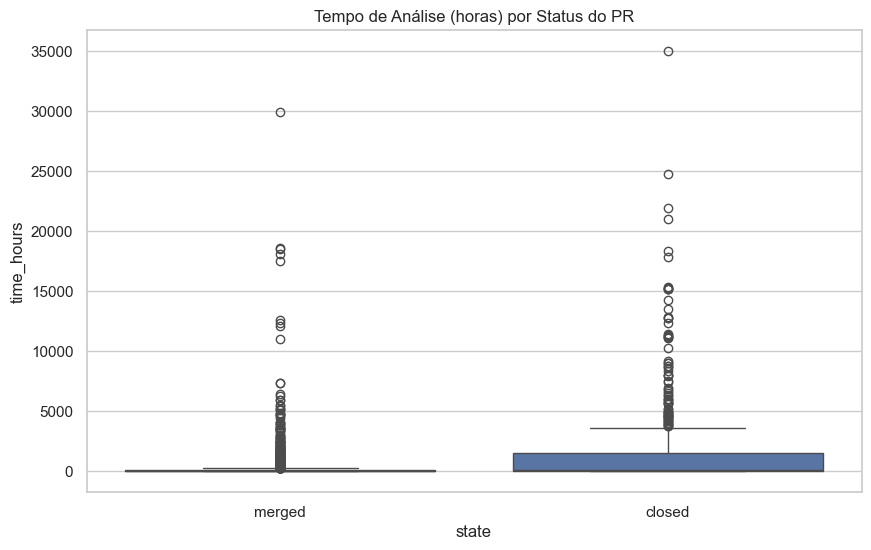

In [5]:
# RQ02: Tempo de Análise × Status

sns.boxplot(x='state', y='time_hours', data=df)
plt.title("Tempo de Análise (horas) por Status do PR")
plt.show()


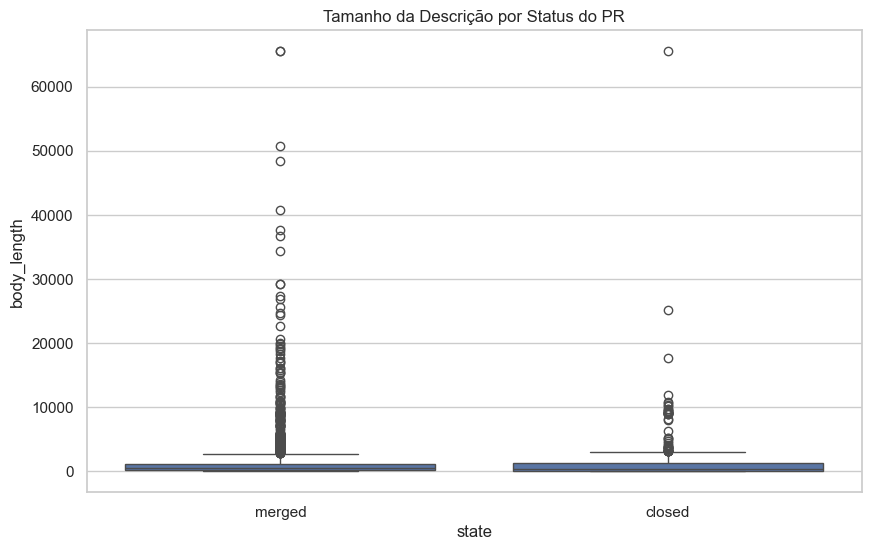

In [6]:
# RQ03: Descrição × Status

sns.boxplot(x='state', y='body_length', data=df)
plt.title("Tamanho da Descrição por Status do PR")
plt.show()

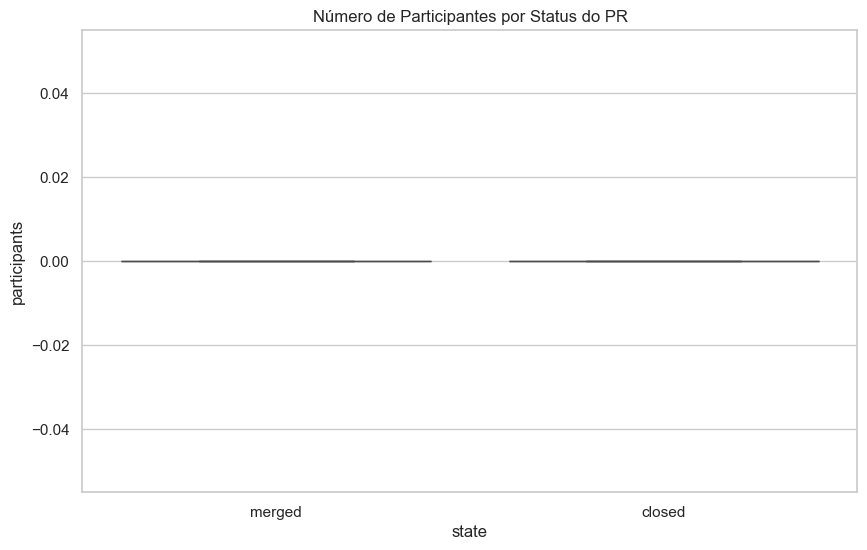

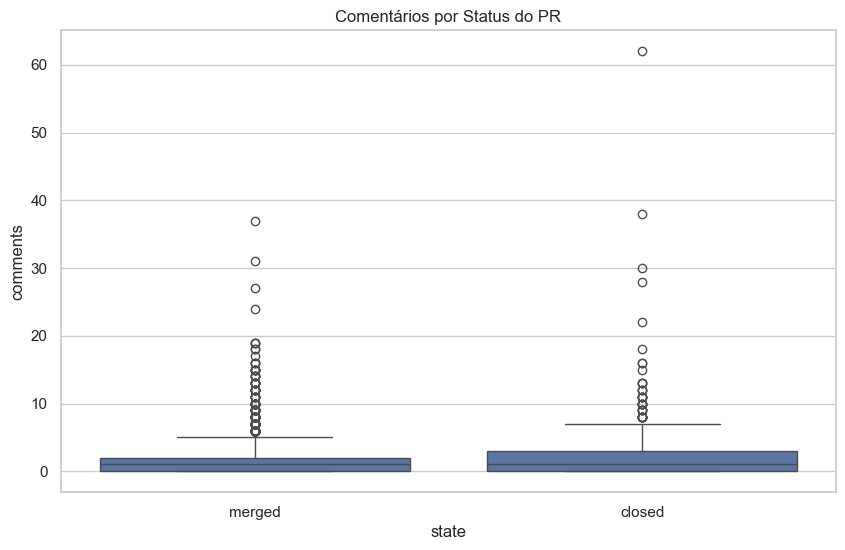

In [7]:
# RQ04: Interações × Status

sns.boxplot(x='state', y='participants', data=df)
plt.title("Número de Participantes por Status do PR")
plt.show()

sns.boxplot(x='state', y='comments', data=df)
plt.title("Comentários por Status do PR")
plt.show()


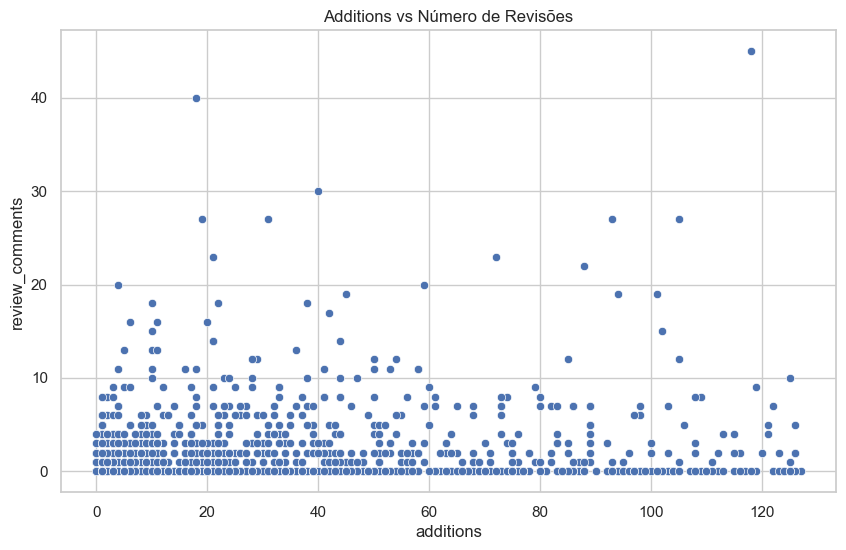

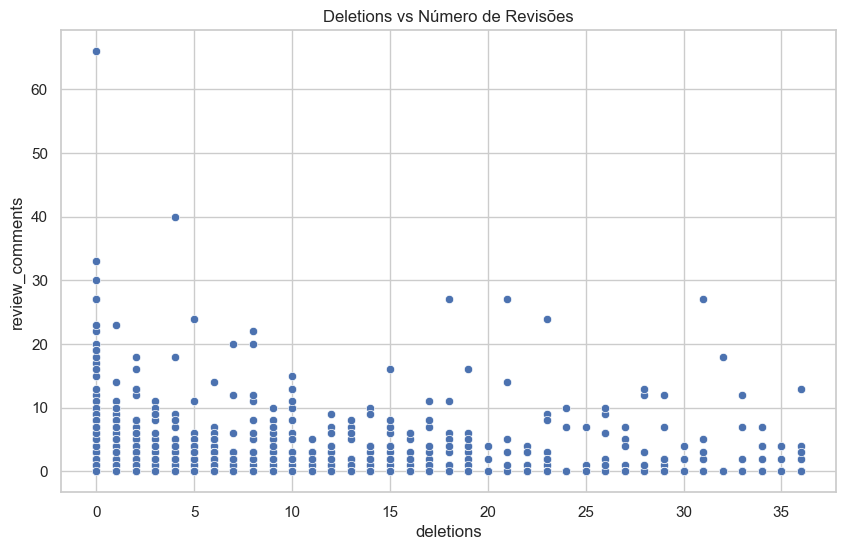

In [8]:
# RQ05: Tamanho do PR × Número de Revisões
sns.scatterplot(x='additions', y='review_comments', data=df_no_outliers_additions)
plt.title("Additions vs Número de Revisões")
plt.show()

sns.scatterplot(x='deletions', y='review_comments', data=df_no_outliers_deletions)
plt.title("Deletions vs Número de Revisões")
plt.show()

In [9]:
corr, p = stats.spearmanr(df['additions'], df['review_comments'])
print("➡️ Correlação de Spearman entre Additions e Review Comments:")
print(f"Coeficiente de Correlação: {corr:.3f}")
print(f"p-valor: {p:.4f}")


➡️ Correlação de Spearman entre Additions e Review Comments:
Coeficiente de Correlação: 0.307
p-valor: 0.0000


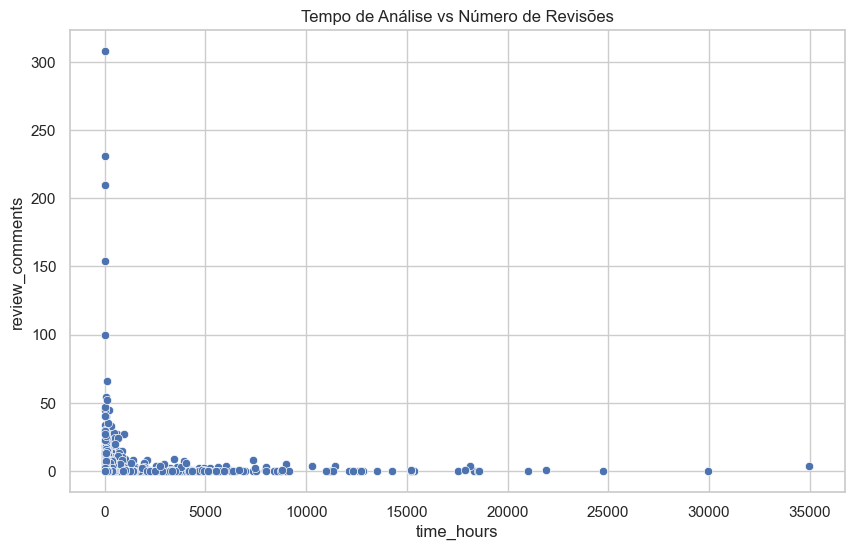

In [10]:
# RQ06: Tempo de Análise × Número de Revisões

sns.scatterplot(x='time_hours', y='review_comments', data=df)
plt.title("Tempo de Análise vs Número de Revisões")
plt.show()


In [11]:
corr, p = stats.spearmanr(df['time_hours'], df['review_comments'])
print("➡️ Correlação de Spearman entre Tempo de Análise e Review Comments:")
print(f"Coeficiente de Correlação: {corr:.3f}")
print(f"p-valor: {p:.4f}")

➡️ Correlação de Spearman entre Tempo de Análise e Review Comments:
Coeficiente de Correlação: 0.115
p-valor: 0.0000


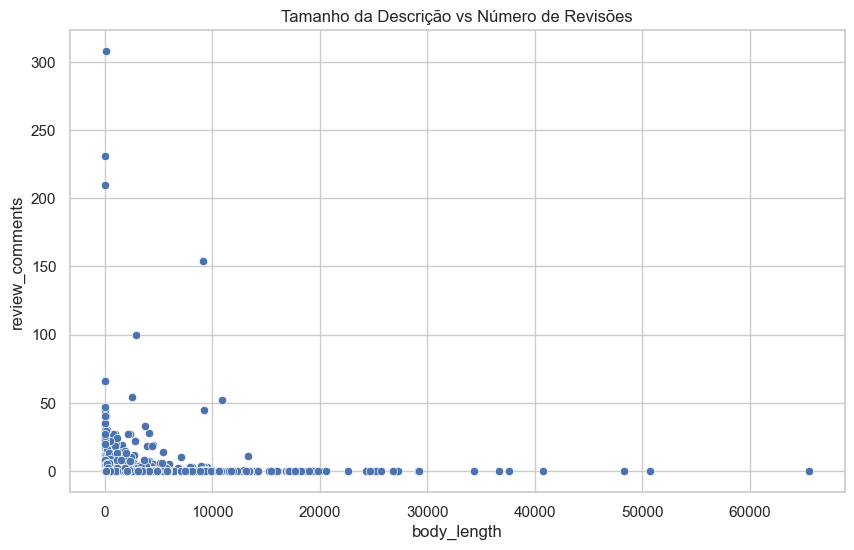

In [12]:
# RQ07: Descrição × Número de Revisões

sns.scatterplot(x='body_length', y='review_comments', data=df)
plt.title("Tamanho da Descrição vs Número de Revisões")
plt.show()

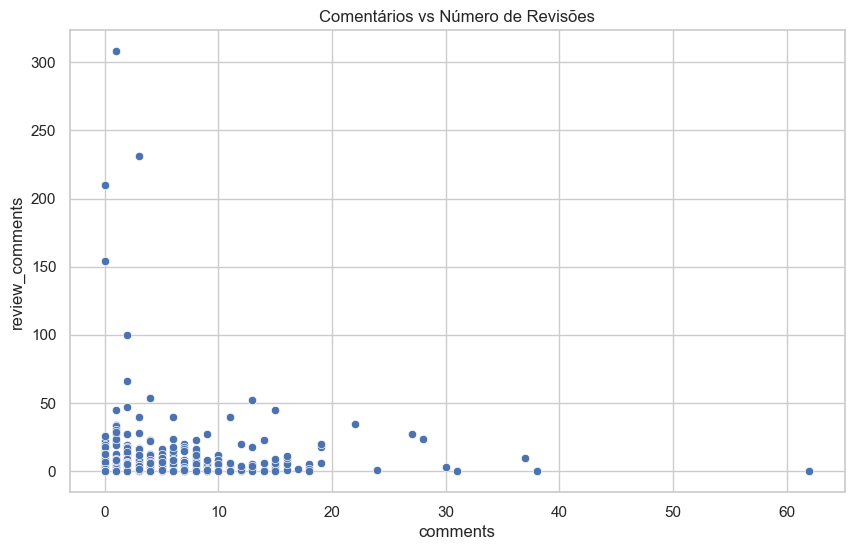

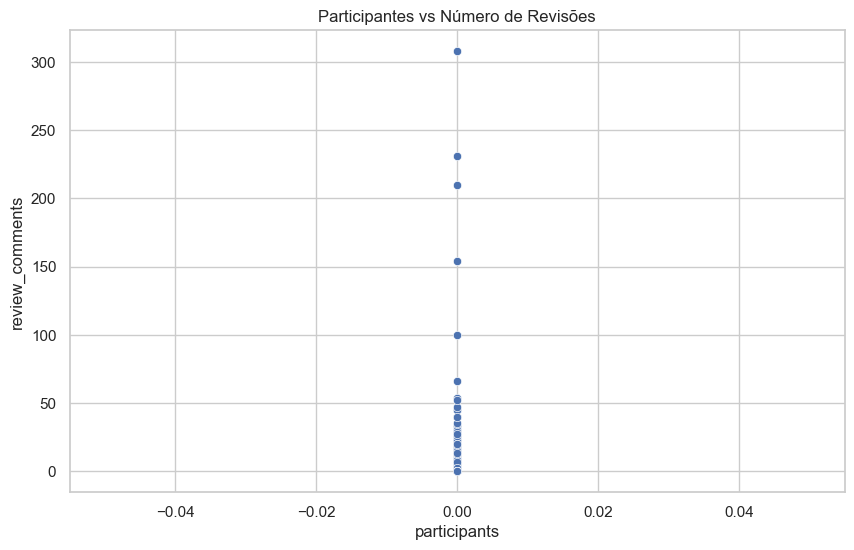

In [13]:
# RQ08: Interações × Número de Revisões

sns.scatterplot(x='comments', y='review_comments', data=df)
plt.title("Comentários vs Número de Revisões")
plt.show()

sns.scatterplot(x='participants', y='review_comments', data=df)
plt.title("Participantes vs Número de Revisões")
plt.show()

